In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## Data Gathering

In [3]:
df=pd.read_csv(r"E:\4feb\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

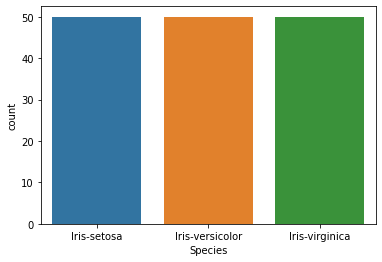

In [5]:
sns.countplot(x=df["Species"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:>

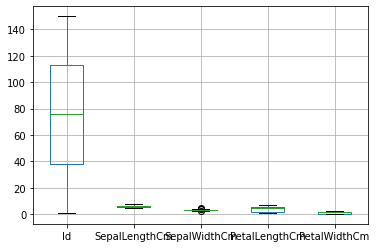

In [7]:
df.boxplot()

In [9]:
df.drop("Id",axis=1,inplace=True)

<AxesSubplot:>

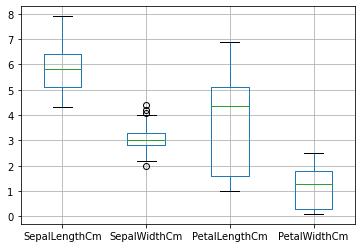

In [10]:
df.boxplot()

In [11]:
## Train Test Split

In [15]:
x=df.drop("Species",axis=1)
y=df["Species"]
x
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3,stratify=y)

In [17]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
16,5.4,3.9,1.3,0.4
33,5.5,4.2,1.4,0.2
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3
58,6.6,2.9,4.6,1.3
...,...,...,...,...
7,5.0,3.4,1.5,0.2
46,5.1,3.8,1.6,0.2
43,5.0,3.5,1.6,0.6
106,4.9,2.5,4.5,1.7


In [18]:
y_train

16         Iris-setosa
33         Iris-setosa
39         Iris-setosa
55     Iris-versicolor
58     Iris-versicolor
            ...       
7          Iris-setosa
46         Iris-setosa
43         Iris-setosa
106     Iris-virginica
84     Iris-versicolor
Name: Species, Length: 105, dtype: object

In [19]:
## Model Training

In [20]:
log_clf=LogisticRegression(multi_class="ovr")
log_clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [21]:
# Testing Data Evaluation
y_pred=log_clf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print(cnf_matrix)

acc_score=accuracy_score(y_test,y_pred)
print(acc_score)

clf_report=classification_report(y_test,y_pred)
print(clf_report)

[[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
0.9111111111111111
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.82      0.93      0.87        15

       accuracy                           0.91        45
      macro avg       0.92      0.91      0.91        45
   weighted avg       0.92      0.91      0.91        45



In [22]:
# Traing Data Evaluation
y_pred_train=log_clf.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pred_train)
print(cnf_matrix)

acc_score=accuracy_score(y_train,y_pred_train)
print(acc_score)

clf_report=classification_report(y_train,y_pred_train)
print(clf_report)

[[35  0  0]
 [ 0 32  3]
 [ 0  1 34]]
0.9619047619047619
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.97      0.91      0.94        35
 Iris-virginica       0.92      0.97      0.94        35

       accuracy                           0.96       105
      macro avg       0.96      0.96      0.96       105
   weighted avg       0.96      0.96      0.96       105



In [23]:
##Final Result

In [24]:
def get_presdicted_class(x1,x2,x3,x4):
    
    predicted_class=log_clf.predict([[x1,x2,x3,x4]])
    
    return predicted_class

SepalLengthCm=5.1
SepalWidthCm=3.5
PetalLengthCm=1.4
PetalWidthCm=0.2

get_presdicted_class(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [27]:
def get_presdicted_class(x1,x2,x3,x4):
    
    predicted_class=log_clf.predict([[x1,x2,x3,x4]])
    
    return predicted_class

SepalLengthCm=6.5
SepalWidthCm=3
PetalLengthCm=5.2
PetalWidthCm=2

get_presdicted_class(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)